<a href="https://colab.research.google.com/github/hxchoongh/Machine_Learning/blob/main/tf_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tenssor Flow - Powerful Library for ML
Tensorflow Serving
Tensorflow Light - Mobiles
Tensorflow.js - Apps
TFX - automomate MLOps

Fashion MNIST
28 x 28 pixels
10 categories

0 Tshirt
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sport shoe
8 bag
9 ankle boot

784 Input nodes - each 1 a pixel
Hidden Layer 128 Nodes (ReLu)
Hidden Layer 64 Nodes (ReLu)
Output Layer 10 NOdes

In [ ]:
# import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']


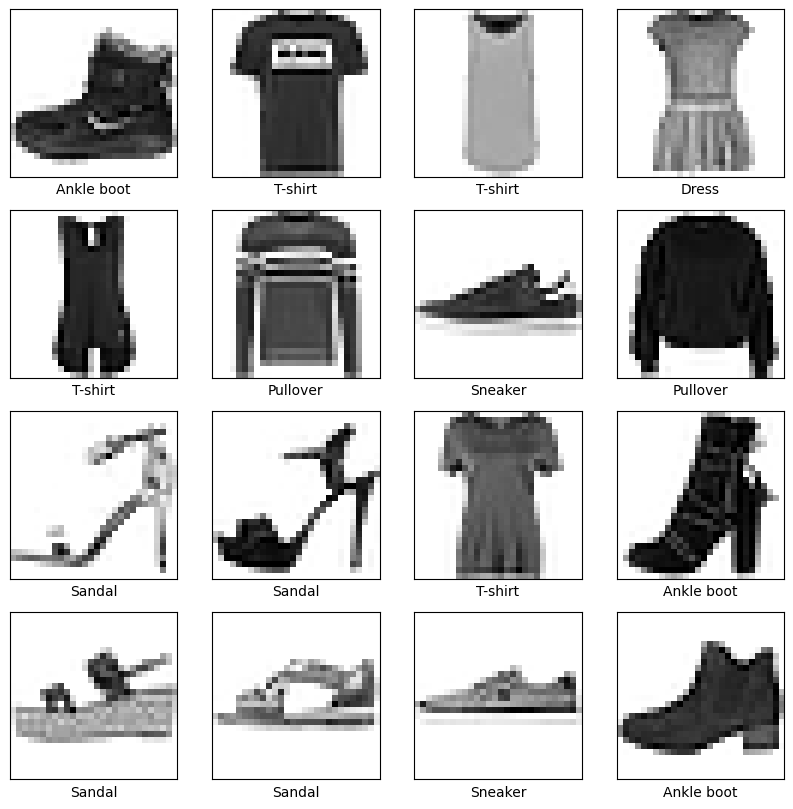

In [ ]:
# Get first 16 images
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Data Processing
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert to tensorflow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000],test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:],test_labels[5000:]))

BATCH_SIZE = 128
train_dataset = train_dataset.shuffle(len(train_dataset)).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
# Build Model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['Accuracy'])

In [ ]:
# Train Model
model.fit(
    train_dataset,
    epochs=10,
    validation_data = validation_dataset
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - Accuracy: 0.7524 - loss: 0.7388 - val_Accuracy: 0.8394 - val_loss: 0.4464
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - Accuracy: 0.8587 - loss: 0.3979 - val_Accuracy: 0.8630 - val_loss: 0.3854
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - Accuracy: 0.8736 - loss: 0.3519 - val_Accuracy: 0.8694 - val_loss: 0.3670
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - Accuracy: 0.8823 - loss: 0.3245 - val_Accuracy: 0.8716 - val_loss: 0.3584
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - Accuracy: 0.8876 - loss: 0.3041 - val_Accuracy: 0.8744 - val_loss: 0.3482
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Accuracy: 0.8922 - loss: 0.2910 - val_Accuracy: 0.8772 - val_loss: 0.3523
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - Accuracy: 0.8980 - loss: 0.2787 - val_Accuracy: 0.8714 - val_loss: 0.3502
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - Accuracy: 0.9032 - loss: 0.2635 - val_Accuracy: 0.

In [ ]:
# Print Accuracy
_, accuracy = model.evaluate(test_dataset)
print(f"The model accuracy is {accuracy * 100:0.1f}%")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.8795 - loss: 0.3492
The model accuracy is 88.6%


In [ ]:
# Make predictions
image_id = 1 # Pick an image id from 0 and 4999 inclusive

probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])



In [ ]:
predictions = probability_model.predict(test_images)
predictions[image_id]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([1.55062953e-05, 5.06775958e-12, 9.99002039e-01, 1.72965088e-07,
       2.97492108e-04, 1.07631515e-10, 6.84795203e-04, 8.20918257e-13,
       4.59411509e-10, 6.49949590e-14], dtype=float32)

In [ ]:
np.argmax(predictions[image_id])

2